In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt;

In [2]:
data = '/kaggle/input/user-reviews/cleaned_data2.csv'
df = pd.read_csv(data)
df.head()

,rating,comment,day,year,month
0,4.0,Updates are regular and accuracy/consistency i...,21,2023,12
1,NaN,This is a useless piece of software. Every ti...,22,2023,12
2,NaN,Getting rid of that subscription or even delet...,20,2023,12
3,1.0,I've had the Quicker Starter for quite sometim...,12,2023,12
4,3.0,I was much happier with Quicken when it was ow...,1,2023,1


### Rating Plots

In [3]:
df['rating'].value_counts().sort_values(ascending=False)

rating
5.0    2357
3.0    1275
4.0    1038
1.0     987
2.0     767
Name: count, dtype: int64

In [4]:
((2357/df['rating'].count())*100).round(2)

36.69

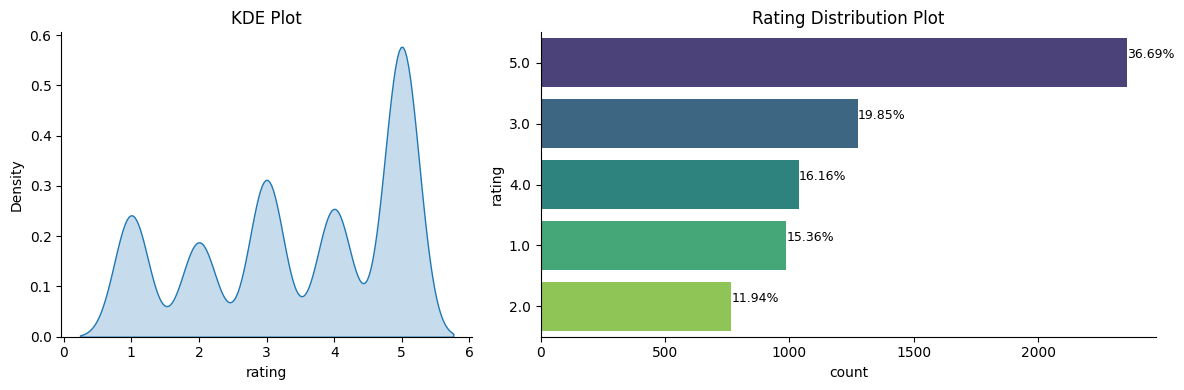

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [4, 6]})

# KDE Plot
sns.kdeplot(data=df, x='rating', fill=True, ax=axes[0])
axes[0].set_title('KDE Plot')
sns.despine(ax=axes[0])

# Count Plot
sns.countplot(y='rating', data=df, palette='viridis', order=df['rating'].value_counts().index, ax=axes[1])
axes[1].set_title('Rating Distribution Plot')
sns.despine(ax=axes[1])

# Add percentages
for p in axes[1].patches:
    width = p.get_width()
    height = p.get_height()
    percentage = ((width / df['rating'].count()) * 100).round(2)
    text_x = width + 0.8
    text_y = p.get_y() + height / 3
    axes[1].text(text_x, text_y, f'{percentage}%', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [6]:
df = df.rename(columns={'date': 'day'})

In [7]:
df['combined_date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,rating,comment,day,year,month,combined_date
0,4.0,Updates are regular and accuracy/consistency i...,21,2023,12,2023-12-21
1,NaN,This is a useless piece of software. Every ti...,22,2023,12,2023-12-22
2,NaN,Getting rid of that subscription or even delet...,20,2023,12,2023-12-20
3,1.0,I've had the Quicker Starter for quite sometim...,12,2023,12,2023-12-12
4,3.0,I was much happier with Quicken when it was ow...,1,2023,1,2023-01-01


In [8]:
min_date = df['combined_date'].min()
max_date = df['combined_date'].max()

print(min_date, max_date)

2022-04-13 00:00:00 2023-12-22 00:00:00


### Day of the week plots

In [9]:
# get day of the week
df['day_of_week'] = pd.to_datetime(df['day'], format='%d').dt.day_name()
df.head()

,rating,comment,day,year,month,combined_date,day_of_week
0,4.0,Updates are regular and accuracy/consistency i...,21,2023,12,2023-12-21,Sunday
1,NaN,This is a useless piece of software. Every ti...,22,2023,12,2023-12-22,Monday
2,NaN,Getting rid of that subscription or even delet...,20,2023,12,2023-12-20,Saturday
3,1.0,I've had the Quicker Starter for quite sometim...,12,2023,12,2023-12-12,Friday
4,3.0,I was much happier with Quicken when it was ow...,1,2023,1,2023-01-01,Monday


In [10]:
# count of day of the week
count_per_day = df['day_of_week'].value_counts()
count_per_day.sort_values(ascending=False).head()

day_of_week
Monday       1168
Tuesday      1041
Friday        940
Sunday        931
Wednesday     892
Name: count, dtype: int64

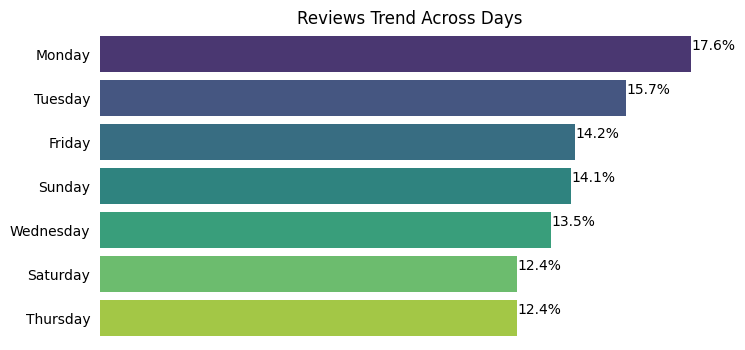

In [11]:
fig, ax = plt.subplots(figsize=(8,4))

# horizontal bar plot
ax = sns.countplot(y='day_of_week', data=df, palette='viridis', order=df['day_of_week'].value_counts().index)

# Add percentages
total = len(df['day_of_week'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.8
    y = p.get_y() + p.get_height() /4
    ax.annotate(percentage, (x, y), ha='left', va='center')
    
# remove spines, ticks and x_axis
ax.xaxis.set_visible(False)
ax.tick_params(axis='y', which='both', left=False)
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)

plt.title('Reviews Trend Across Days')
plt.ylabel('')
plt.show()

### Month Plots

In [12]:
df['month_short'] = df['month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

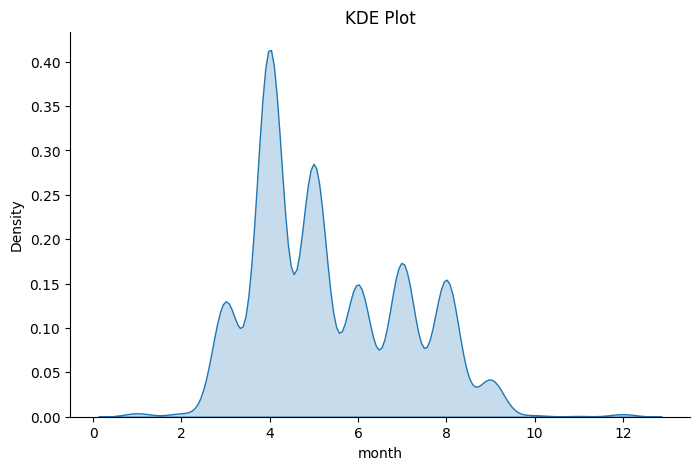

In [13]:
# kde plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data=df, x='month', fill=True, ax=ax)
ax.set_title('KDE Plot')
sns.despine(ax=ax)

plt.show()

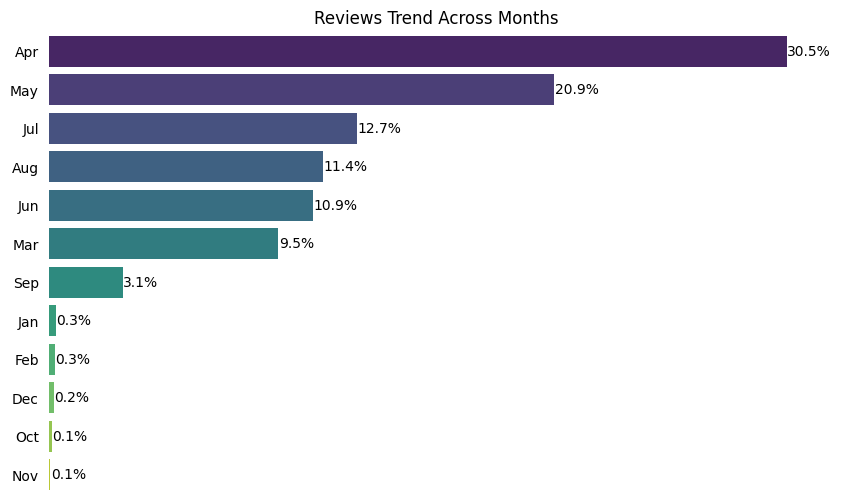

In [17]:
# horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='month_short', data=df, palette='viridis', order=df['month_short'].value_counts().index, ax=ax)
ax.set_title('Count Plot')
total = len(df['month_short'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10)

ax.xaxis.set_visible(False)
ax.tick_params(axis='y', which='both', left=False)
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)

plt.title('Reviews Trend Across Months')
plt.ylabel('')

plt.show()

In [21]:
day_of_week_counts = df['day_of_week'].value_counts()
day_of_week_percentages = ((day_of_week_counts / len(df)) * 100).round(2)
day_of_week_cumulative_percentages = day_of_week_percentages.cumsum().round(2)

# Create a new DataFrame
df_dow = pd.DataFrame({
    'Count': day_of_week_counts,
    'Percentage': day_of_week_percentages,
    'Cumulative Percentage': day_of_week_cumulative_percentages
})

df_dow

,Count,Percentage,Cumulative Percentage
day_of_week,,,
Monday,1168,17.64,17.64
Tuesday,1041,15.73,33.37
Friday,940,14.20,47.57
Sunday,931,14.06,61.63
Wednesday,892,13.47,75.10
Saturday,824,12.45,87.55
Thursday,824,12.45,100.00


In [23]:
month_counts = df['month_short'].value_counts()
month_percentages = ((month_counts / len(df)) * 100).round(2)
month_cumulative_percentages = month_percentages.cumsum().round(2)

# Create a new DataFrame
df_month = pd.DataFrame({
    'Count': month_counts,
    'Percentage': month_week_percentages,
    'Cumulative Percentage': month_cumulative_percentages
})

df_month

,Count,Percentage,Cumulative Percentage
month_short,,,
Apr,2022,30.54,30.54
May,1385,20.92,51.46
Jul,844,12.75,64.21
Aug,752,11.36,75.57
Jun,723,10.92,86.49
Mar,629,9.50,95.99
Sep,203,3.07,99.06
Jan,19,0.29,99.35
Feb,17,0.26,99.61


In [15]:
df.to_csv('cleaned_data.csv', index=False)